## Sales Analysis


In [2]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# load the dataset
sales_data = pd.read_csv('train.csv')
sales_data.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4593,4594,CA-2017-129868,26/12/2017,31/12/2017,Standard Class,MC-18130,Mike Caudle,Corporate,United States,Los Angeles,California,90004.0,West,OFF-AP-10004052,Office Supplies,Appliances,Hoover Replacement Belts For Soft Guard & Comm...,7.9


In [4]:
# knowing the shape of data
sales_data.shape

(9800, 18)

So, this dataset contains 18 columns and 9800 rows.

### Lets Check the datasets
* if there is null value exist
* columns 
* data info 
* deal with missing data


In [5]:
# learn about data types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# knowing the columns
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
# checking if there is null value exist or not
sales_data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
# Find the appropriate value of postal code to replace missing postal code of address
sales_data['Postal Code'].mode()[0]

10035.0

In [9]:
# Deal with missing value
# replacing missing postal codes with most common postal code.
sales_data['Postal Code'] = sales_data['Postal Code'].fillna(sales_data['Postal Code'].mode()[0])

#rechecking if still there null value exist
sales_data.isna().sum()

# drop null values of random places 

sales_data.dropna(inplace=True)
# Drop dulicates 
sales_data.drop_duplicates(inplace=True)

In [10]:
# checking duplicates 
sales_data.duplicated().sum()

0

### Last but not the least
- change the datatype of order date and shipped date, add new colums as - ordered_year, ordered_month, shipped_year, shipped_month

In [11]:
sales_data.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
5340,5341,CA-2016-146486,09/11/2016,14/11/2016,Second Class,DV-13465,Dianna Vittorini,Consumer,United States,Oceanside,New York,11572.0,East,TEC-AC-10002018,Technology,Accessories,AmazonBasics 3-Button USB Wired Mouse,13.98
212,213,CA-2016-146262,02/01/2016,09/01/2016,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256.0,East,OFF-LA-10004544,Office Supplies,Labels,Avery 505,23.68


In [12]:
# strip() date , date may contains spaceses
sales_data['Order Date']=sales_data['Order Date'].str.strip()
sales_data['Ship Date']=sales_data['Ship Date'].str.strip()


# convert data object type into datetime 
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format="%d/%m/%Y")
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], format="%d/%m/%Y")

# extract year and month using pandas dt accessor
# order date
sales_data['ordered_year'] = sales_data['Order Date'].dt.year
sales_data['Ordered_month'] = sales_data['Order Date'].dt.month_name()

# ship date 
sales_data['shipped_year'] = sales_data['Ship Date'].dt.year
sales_data['shipped_month'] = sales_data['Ship Date'].dt.month_name()

In [13]:
sales_data.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,ordered_year,Ordered_month,shipped_year,shipped_month
3479,3480,CA-2017-131289,2017-12-08,2017-12-14,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,San Francisco,...,West,OFF-PA-10003363,Office Supplies,Paper,Xerox 204,45.360,2017,December,2017,December
3075,3076,CA-2015-143903,2015-07-20,2015-07-24,Standard Class,KM-16375,Katherine Murray,Home Office,United States,Dallas,...,Central,OFF-ST-10003306,Office Supplies,Storage,Letter Size Cart,342.864,2015,July,2015,July


### Everyting about preprocessing is sorted out!

### ------------------------------------------------

# Lets extract business insights!

- finding out sales on the basis of category, region, city and ship mode

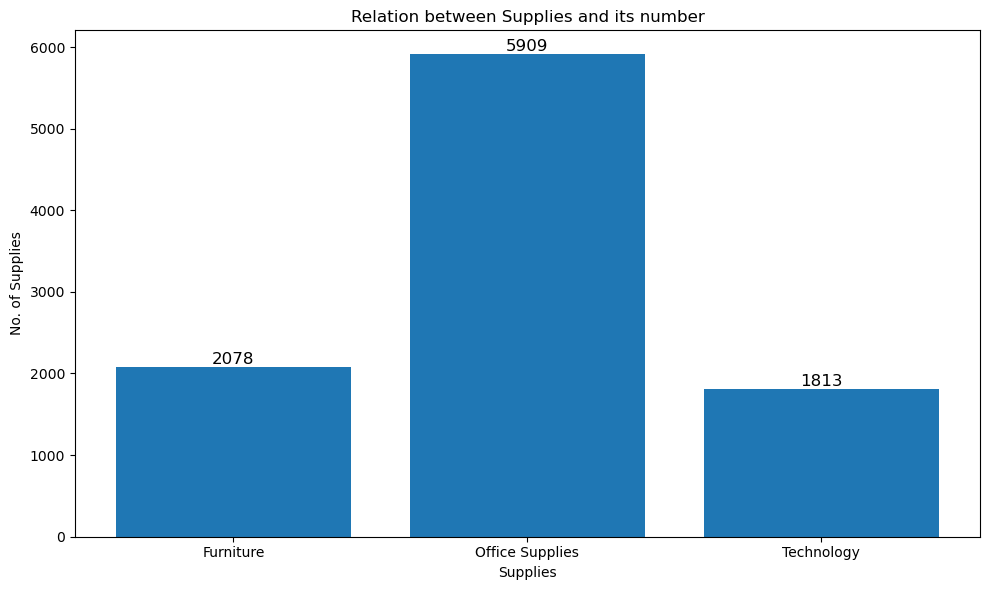

In [14]:
# creating chart on the basis of categorical supplies
sales_on_category=sales_data.groupby('Category')['Category'].value_counts()

# create a bar chart 
plt.figure(figsize=(10,6))
bars= plt.bar(sales_on_category.index, sales_on_category.values)

# # add count values on top of bars
for bar, count in zip(bars,sales_on_category.values ):
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval+0.2, count, ha='center', va='bottom', fontsize=12)

# customize the plot
plt.title("Relation between Supplies and its number")
plt.xlabel("Supplies")
plt.ylabel('No. of Supplies')
plt.tight_layout()

- On the basis of region

In [15]:
sales_data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [16]:
sales_on_region=sales_data.groupby('Region').Region.value_counts()

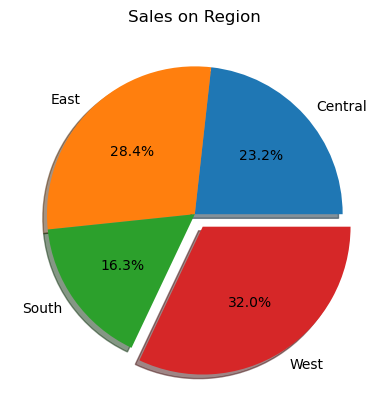

In [17]:
# Creating pie chart 
fig, ax = plt.subplots()
ax.pie(sales_on_region, labels=sales_on_region.index, autopct='%.1f%%', explode=[0,0,0,.1], shadow=True)
plt.title("Sales on Region")
plt.show()

- On the basis of city

In [18]:
sales_data['City'].value_counts().count()


529

- As there are 529 cities, So, lets see top 10 cities that ordered the most suppliments.

In [19]:
top_ten_cities = sales_data['City'].value_counts().sort_values(ascending=False).head(10)
top_ten_cities

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Name: count, dtype: int64

<AxesSubplot: xlabel='City'>

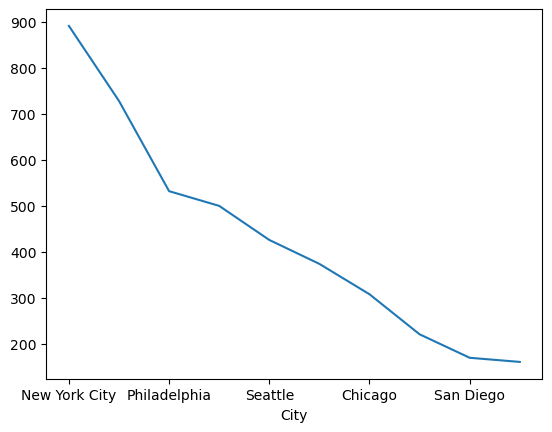

In [20]:
top_ten_cities.plot.line()

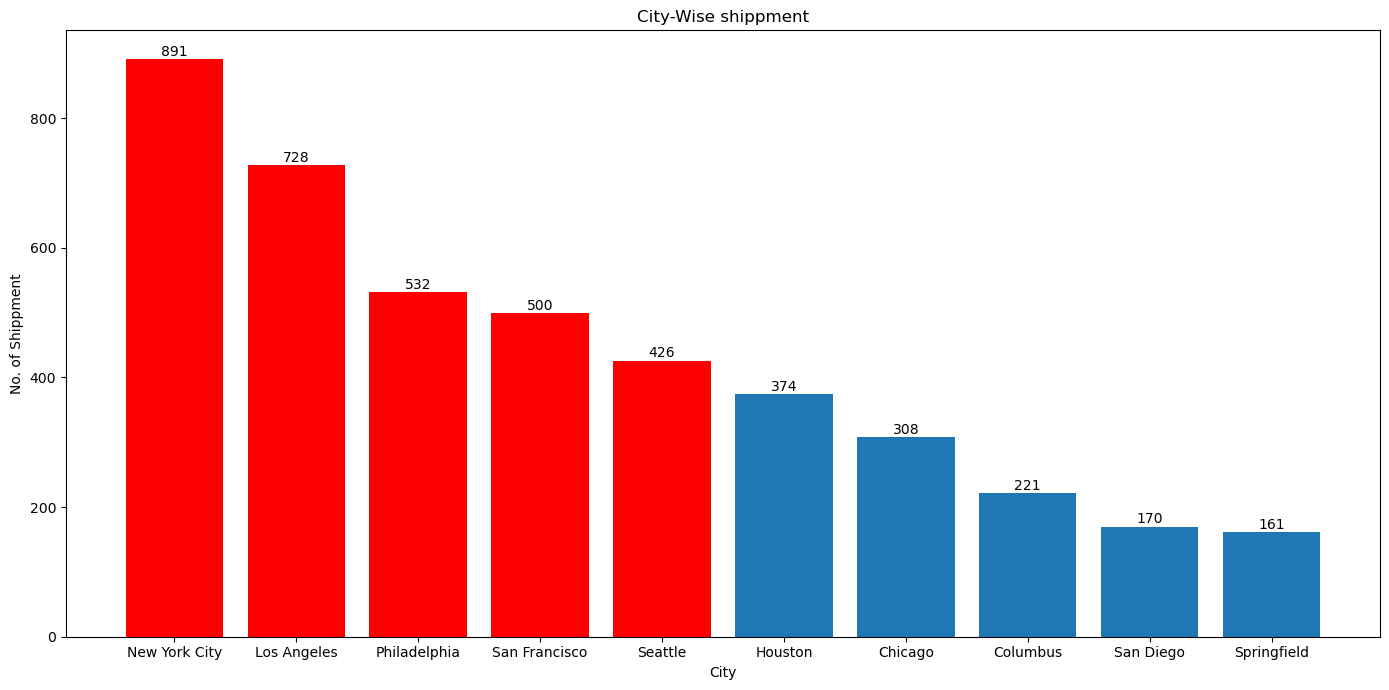

In [21]:
#Ploting bar
fig, ax = plt.subplots(figsize=(14,7))
bars =ax.bar(top_ten_cities.index, top_ten_cities.values)

# adding labels 
for bar, count in zip(bars, top_ten_cities.values):
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, yval+0.2, count, ha='center', va='bottom')


# heightlight top 5 countries 
plt.bar(top_ten_cities.index[:5], top_ten_cities.values[:5], color='red')

#customize the plot 
plt.title("City-Wise shippment")
plt.xlabel("City")
plt.ylabel("No. of Shippment")
plt.tight_layout()
plt.show()

- On the basis of Shippment mode

In [22]:
sales_data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [23]:
ship_mode=sales_data['Ship Mode'].value_counts()

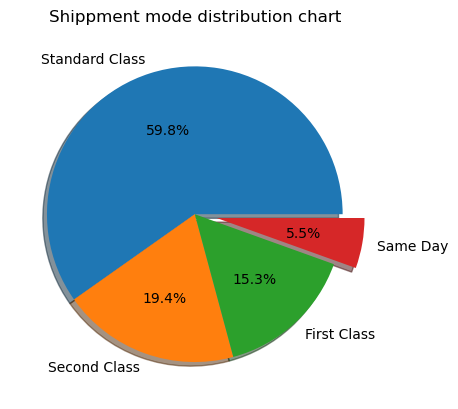

In [24]:
fig, ax = plt.subplots()
ax.pie(ship_mode, labels=ship_mode.index, autopct='%.1f%%', explode=[0,0,0,.15], shadow=True)
plt.title("Shippment mode distribution chart")
plt.show()

- Region-Wise shipment mode Bar chart

In [153]:

region_shipmode=sales_data.groupby(['Region'])['Ship Mode'].value_counts()
region_shipmode_frame = region_shipmode.unstack()



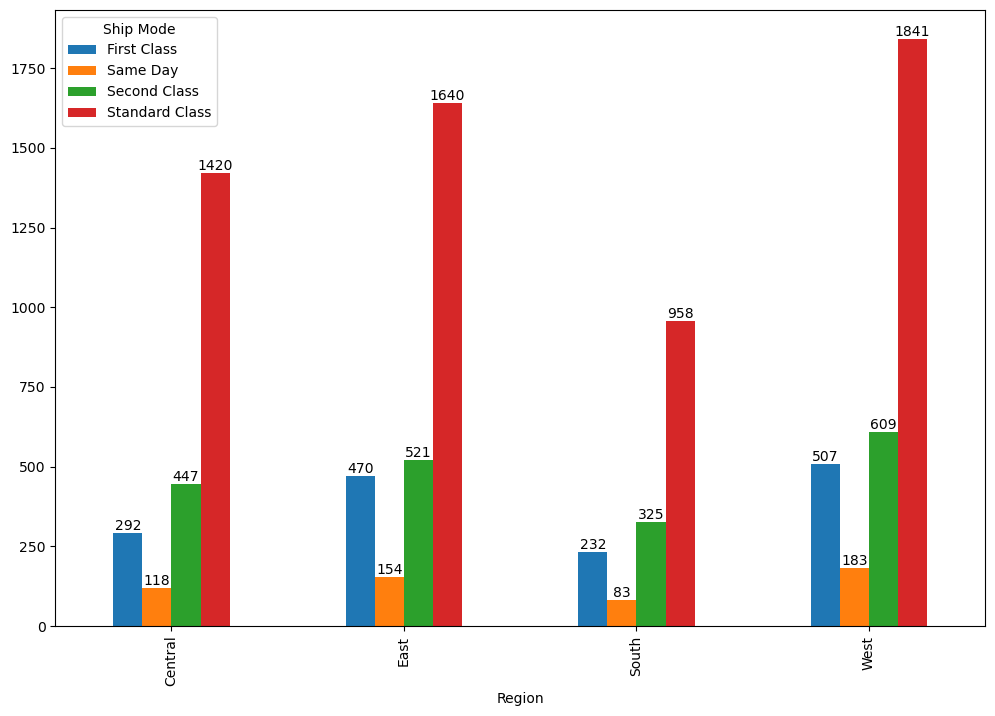

In [152]:
# creating a bar chart 
ax = region_shipmode_frame.plot(kind='bar', figsize=(12,8))
for container in ax.containers:
    ax.bar_label(container)

- Nothing special, but good to know

In [179]:
line_plot=sales_data['Sub-Category'].value_counts()

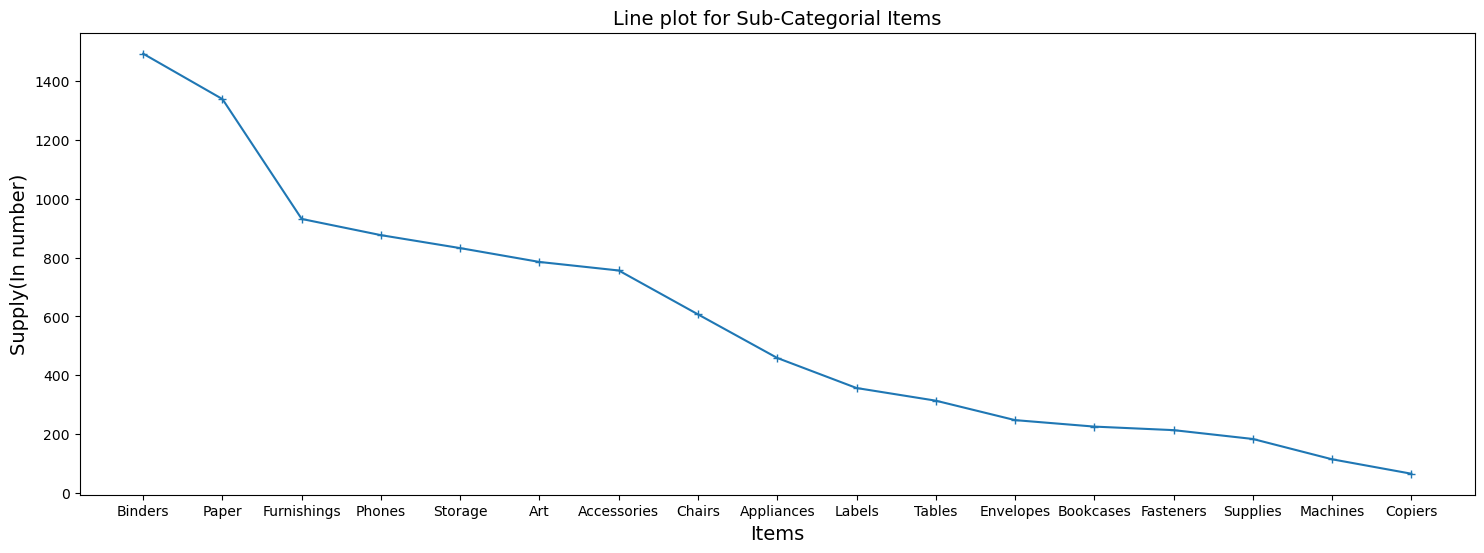

In [207]:
# plotting line for sub-categorial data.
plt.figure(figsize=(18,6))
plt.plot(line_plot.index, line_plot.values, marker='+')
plt.title("Line plot for Sub-Categorial Items", fontsize=14)
plt.xlabel("Items", fontsize=14)
plt.ylabel('Supply(In number)', fontsize=14)
plt.show()


- Finding highest order/suppliment period (year and month)

In [208]:
sales_data.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,ordered_year,Ordered_month,shipped_year,shipped_month
8562,8563,CA-2017-123540,2017-04-02,2017-04-06,Second Class,DJ-13420,Denny Joy,Corporate,United States,Milwaukee,...,Central,FUR-CH-10000847,Furniture,Chairs,Global Executive Mid-Back Manager's Chair,1454.9,2017,April,2017,April


In [254]:
# finding year-wise order
yearwise_order=sales_data.groupby('ordered_year')['ordered_year'].value_counts()
yearwise_order

ordered_year
2015    1953
2016    2055
2017    2534
2018    3258
Name: count, dtype: int64

In [260]:
# finding year-wise shipment
yearwise_shippment =sales_data[sales_data.shipped_year!=2019].groupby('shipped_year')['shipped_year'].value_counts()
yearwise_shippment

shipped_year
2015    1902
2016    2083
2017    2524
2018    3249
Name: count, dtype: int64

In [265]:
# finding monthwise order and shipment 
monthly_order=sales_data.groupby('Ordered_month')['Ordered_month'].value_counts().sort_values(ascending=False)
monthly_order


Ordered_month
November     1449
December     1382
September    1354
October       809
May           725
July          697
August        693
June          691
March         680
April         657
January       366
February      297
Name: count, dtype: int64

In [266]:
monthly_supply=sales_data.groupby('shipped_month')['shipped_month'].value_counts().sort_values(ascending=False)
monthly_supply

shipped_month
November     1414
December     1384
September    1337
October       811
June          740
July          707
May           684
August        660
April         641
March         634
January       464
February      324
Name: count, dtype: int64

### Relation between yearly demand and supply 

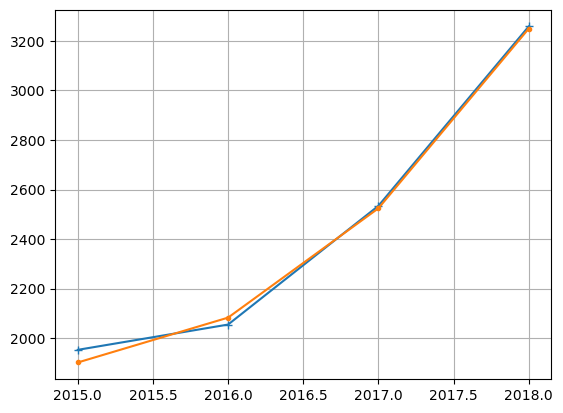

In [271]:

plt.plot(yearwise_order.index, yearwise_order.values, marker='+')
plt.plot(yearwise_shippment.index, yearwise_shippment.values, marker='.')
plt.grid()
plt.show()

### Monthly order and supply

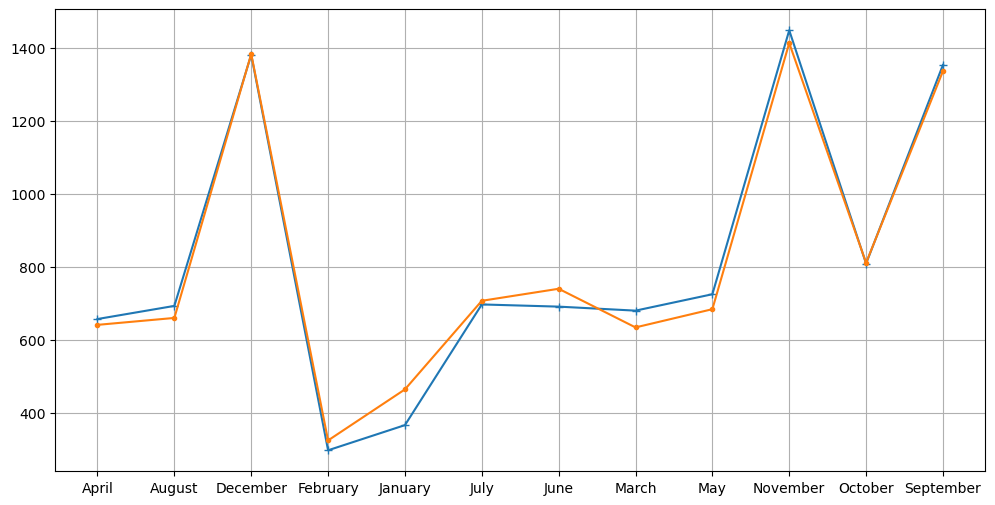

In [270]:
plt.figure(figsize=(12,6))
plt.plot(monthly_order.sort_index().index, monthly_order.sort_index().values, marker='+')
plt.plot(monthly_supply.sort_index().index, monthly_supply.sort_index().values, marker='.')
plt.grid()
plt.show()

In [272]:
sales_data.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,ordered_year,Ordered_month,shipped_year,shipped_month
8289,8290,CA-2015-156244,2015-08-12,2015-08-16,Standard Class,DH-13675,Duane Huffman,Home Office,United States,Miami,...,South,OFF-AP-10002403,Office Supplies,Appliances,Acco Smartsocket Color-Coded Six-Outlet AC Ada...,211.248,2015,August,2015,August


In [282]:
# total unique products
sales_data['Product Name'].unique().shape

(1849,)

In [285]:
# top five unique product 
sales_data['Product Name'].value_counts().sort_values(ascending=False).head(5)

Product Name
Staple envelope            47
Staples                    46
Easy-staple paper          44
Avery Non-Stick Binders    20
Staples in misc. colors    18
Name: count, dtype: int64

## Finding the Sales 

- yearly sales

In [296]:
sales_data.groupby('ordered_year')['Sales'].sum() 

ordered_year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64